In [1]:
import math 
import h5py
import numpy as np

In [2]:
f=h5py.File('density.h5')
f.keys()
dset=f['density']
dens=np.array(dset)

In [3]:
dens.shape

(256, 256, 256)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

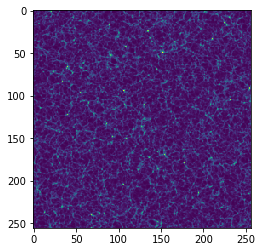

In [5]:
plt.imshow(dens[:,:,5])

In [6]:
dens2D1=dens[:,:,5]

In [8]:
from scipy.ndimage import gaussian_filter #Para Filtro Gaussiano

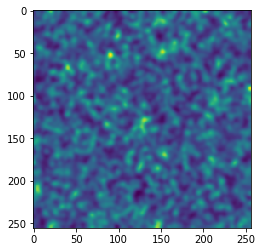

In [9]:
dens2D2=gaussian_filter(dens2D1, sigma=2.6)
plt.imshow(dens2D2)

In [10]:
dens2D3=gaussian_filter(dens2D1, sigma=2.0)
dens2D4=gaussian_filter(dens2D1, sigma=5.0)

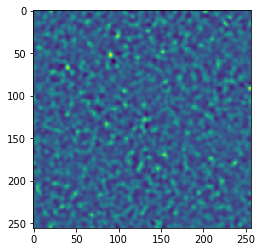

In [11]:
dens2D5=dens2D3-dens2D4 #Diferencia de filtros
plt.imshow(dens2D5)

In [13]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
image = dens2D1
image_gray = rgb2gray(image)
blobs_dog = blob_dog(image_gray, max_sigma=2, threshold=.1) #Extraer coordenadas con Diferencia de Gaussianas

In [14]:
blobs_dog.shape

(1711, 3)

In [15]:
blobs_dog

array([[255. , 250. ,   1. ],
       [255. , 194. ,   1. ],
       [255. , 187. ,   1.6],
       ...,
       [  0. ,  31. ,   1.6],
       [  0. ,  21. ,   1.6],
       [  0. ,   2. ,   1. ]])

In [16]:
train128x128=dens2D1[2:129,2:129] #Muestra de 128x128 (1/4 de la caja)

In [17]:
imagetrain = train128x128
image_graytrain = rgb2gray(imagetrain)
blobs_dog1 = blob_dog(image_graytrain, max_sigma=2, threshold=.1)

In [18]:
blobs_dog1.shape

(418, 3)

In [19]:
coordinates_train128=blobs_dog1

In [20]:
import pandas as pd
df1 = pd.DataFrame(coordinates_train128)
df1.to_csv("coordtrain128x128.csv")

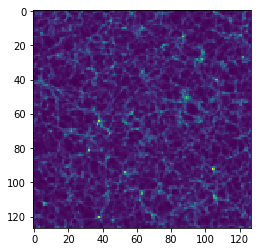

In [21]:
plt.imshow(train128x128)

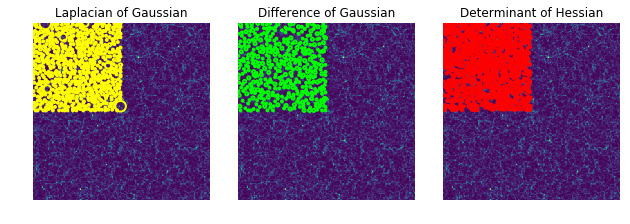

In [22]:
blobs_log = blob_log(image_graytrain, max_sigma=6, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_graytrain, max_sigma=2, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_graytrain, max_sigma=2, threshold=.001)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

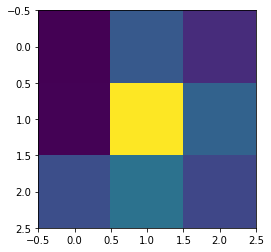

In [24]:
plt.imshow(train128x128[0:3,11:14]) #Halo en el centro?

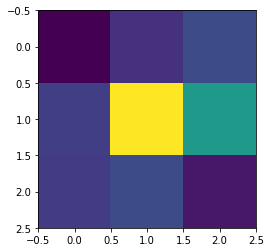

In [25]:
plt.imshow(train128x128[0:3,34:37])

In [26]:
coordenadas_df1=pd.read_csv("coordinates_train128.csv")

In [27]:
coordenadas_df1

,1,125,114
0,2,124,75
1,3,124,22
2,4,123,66
3,5,123,10
4,6,122,104
5,7,122,46
6,8,121,117
7,9,121,31
8,10,120,112
9,11,120,51


In [27]:
numpy_matrix = coordenadas_df1.as_matrix()

/Users/diegobarbosa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [28]:
numpy_matrix.shape

(336, 3)

In [34]:
coorX=numpy_matrix[:,1]
coorY=numpy_matrix[:,2]

In [35]:
datatrain=[]
for i in range(0,334):
    data1=train128x128[coorX[i]-1:coorX[i]+2,coorY[i]-1:coorY[i]+2]
    datfl=np.ndarray.flatten(data1)
    datatrain.append(datfl)

In [36]:
sf= np.array(datatrain)

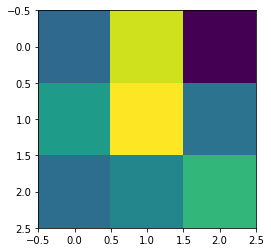

In [37]:
plt.imshow(sf[1].reshape(3,3))

In [38]:
sf.shape

(334, 9)

In [39]:
#Features Halo
datafeatures1 = pd.DataFrame(sf)
datafeatures1.to_csv("features11.csv")

Encontrar features para los vacios